In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# The code was removed by Watson Studio for sharing.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y


In [3]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [4]:
dataset["Gender"] = dataset["Gender"].replace(["Male", "Female"], [1,0])
dataset["Married"] = dataset["Married"].replace(["Yes", "No"], [1,0])
dataset["Education"] = dataset["Education"].replace(["Graduate", "Not Graduate"], [1,0])
dataset["Self_Employed"] = dataset["Self_Employed"].replace(["Yes", "No"], [1,0])
dataset["Loan_Status"] = dataset["Loan_Status"].replace(["Y", "N"], [1,0])

In [5]:
dataset['Gender'].fillna(dataset['Gender'].median(),inplace=True)
dataset['Married'].fillna(dataset['Married'].median(),inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].median(),inplace=True)
dataset['LoanAmount'].fillna(dataset['LoanAmount'].median(),inplace=True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].median(),inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].median(),inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].median(),inplace=True)

In [6]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

In [7]:
x = dataset.iloc[:,1:11].values
y=dataset.iloc[:,11].values

In [8]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [11]:
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict([[1,0,1,1,0,4583,1508,128,360,1]])
y_pred2 = classifier.predict([[1,1,0,1,0,3000,0,66,360,1]])

In [12]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [13]:
y_pred1

array([0])

In [14]:
y_pred2

array([1])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7857142857142857

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [17]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

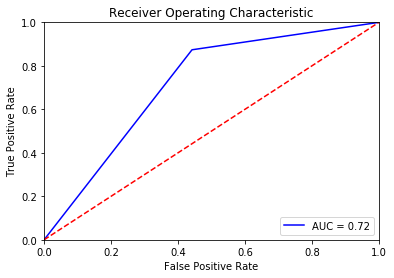

In [18]:

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


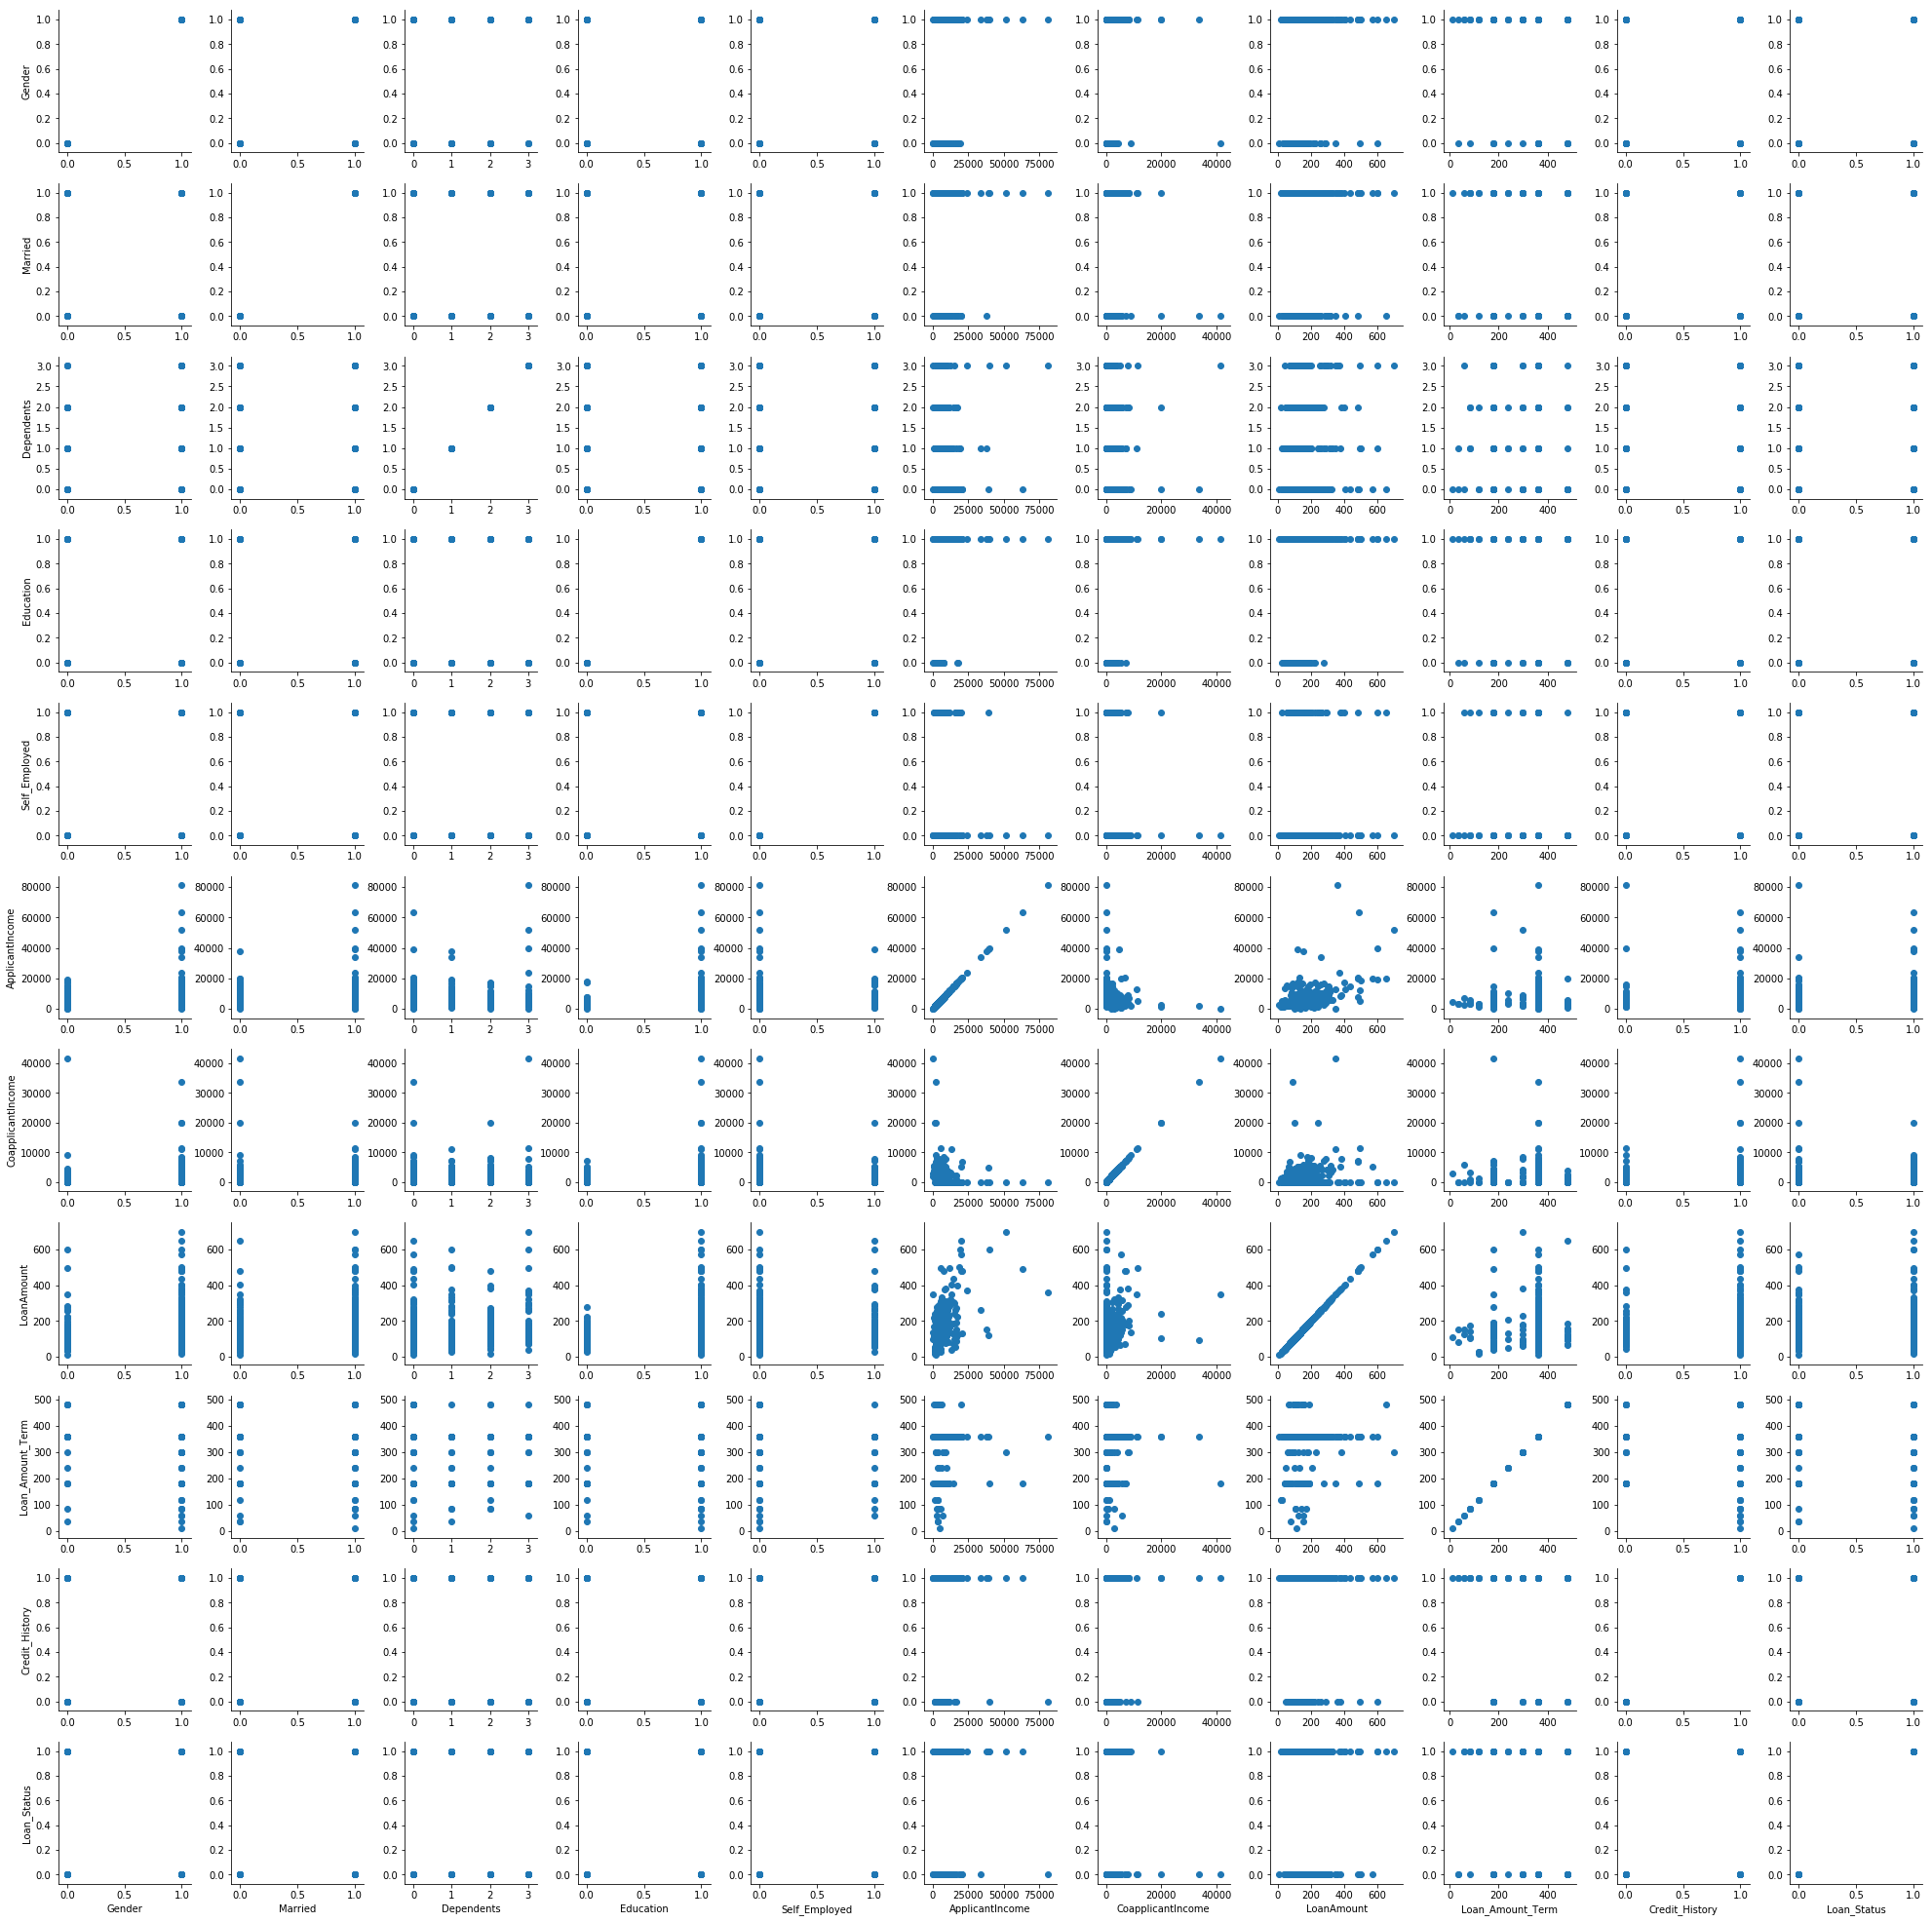

In [19]:

import seaborn as sns
g=sns.PairGrid(dataset)
g.map(plt.scatter)

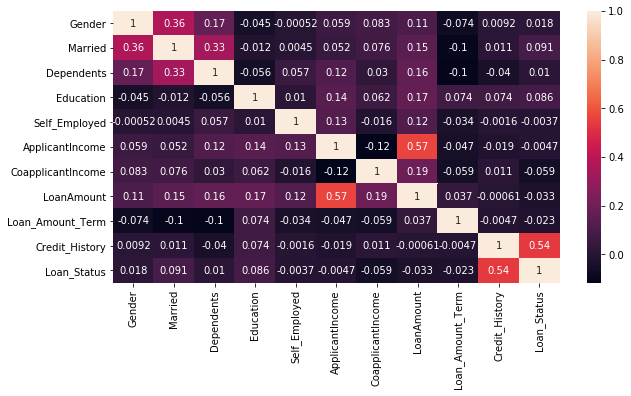

In [20]:

plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa5a4600e80>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa5a46069e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa5a460a748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa5a460a2e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa5a4606048>,
  <matplotlib.lines.Line2D at 0x7fa5a4606588>]}

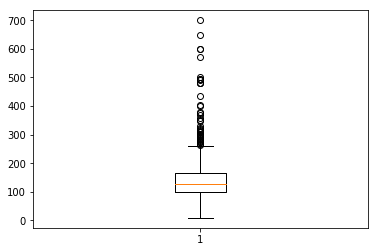

In [21]:
plt.boxplot(dataset["LoanAmount"])

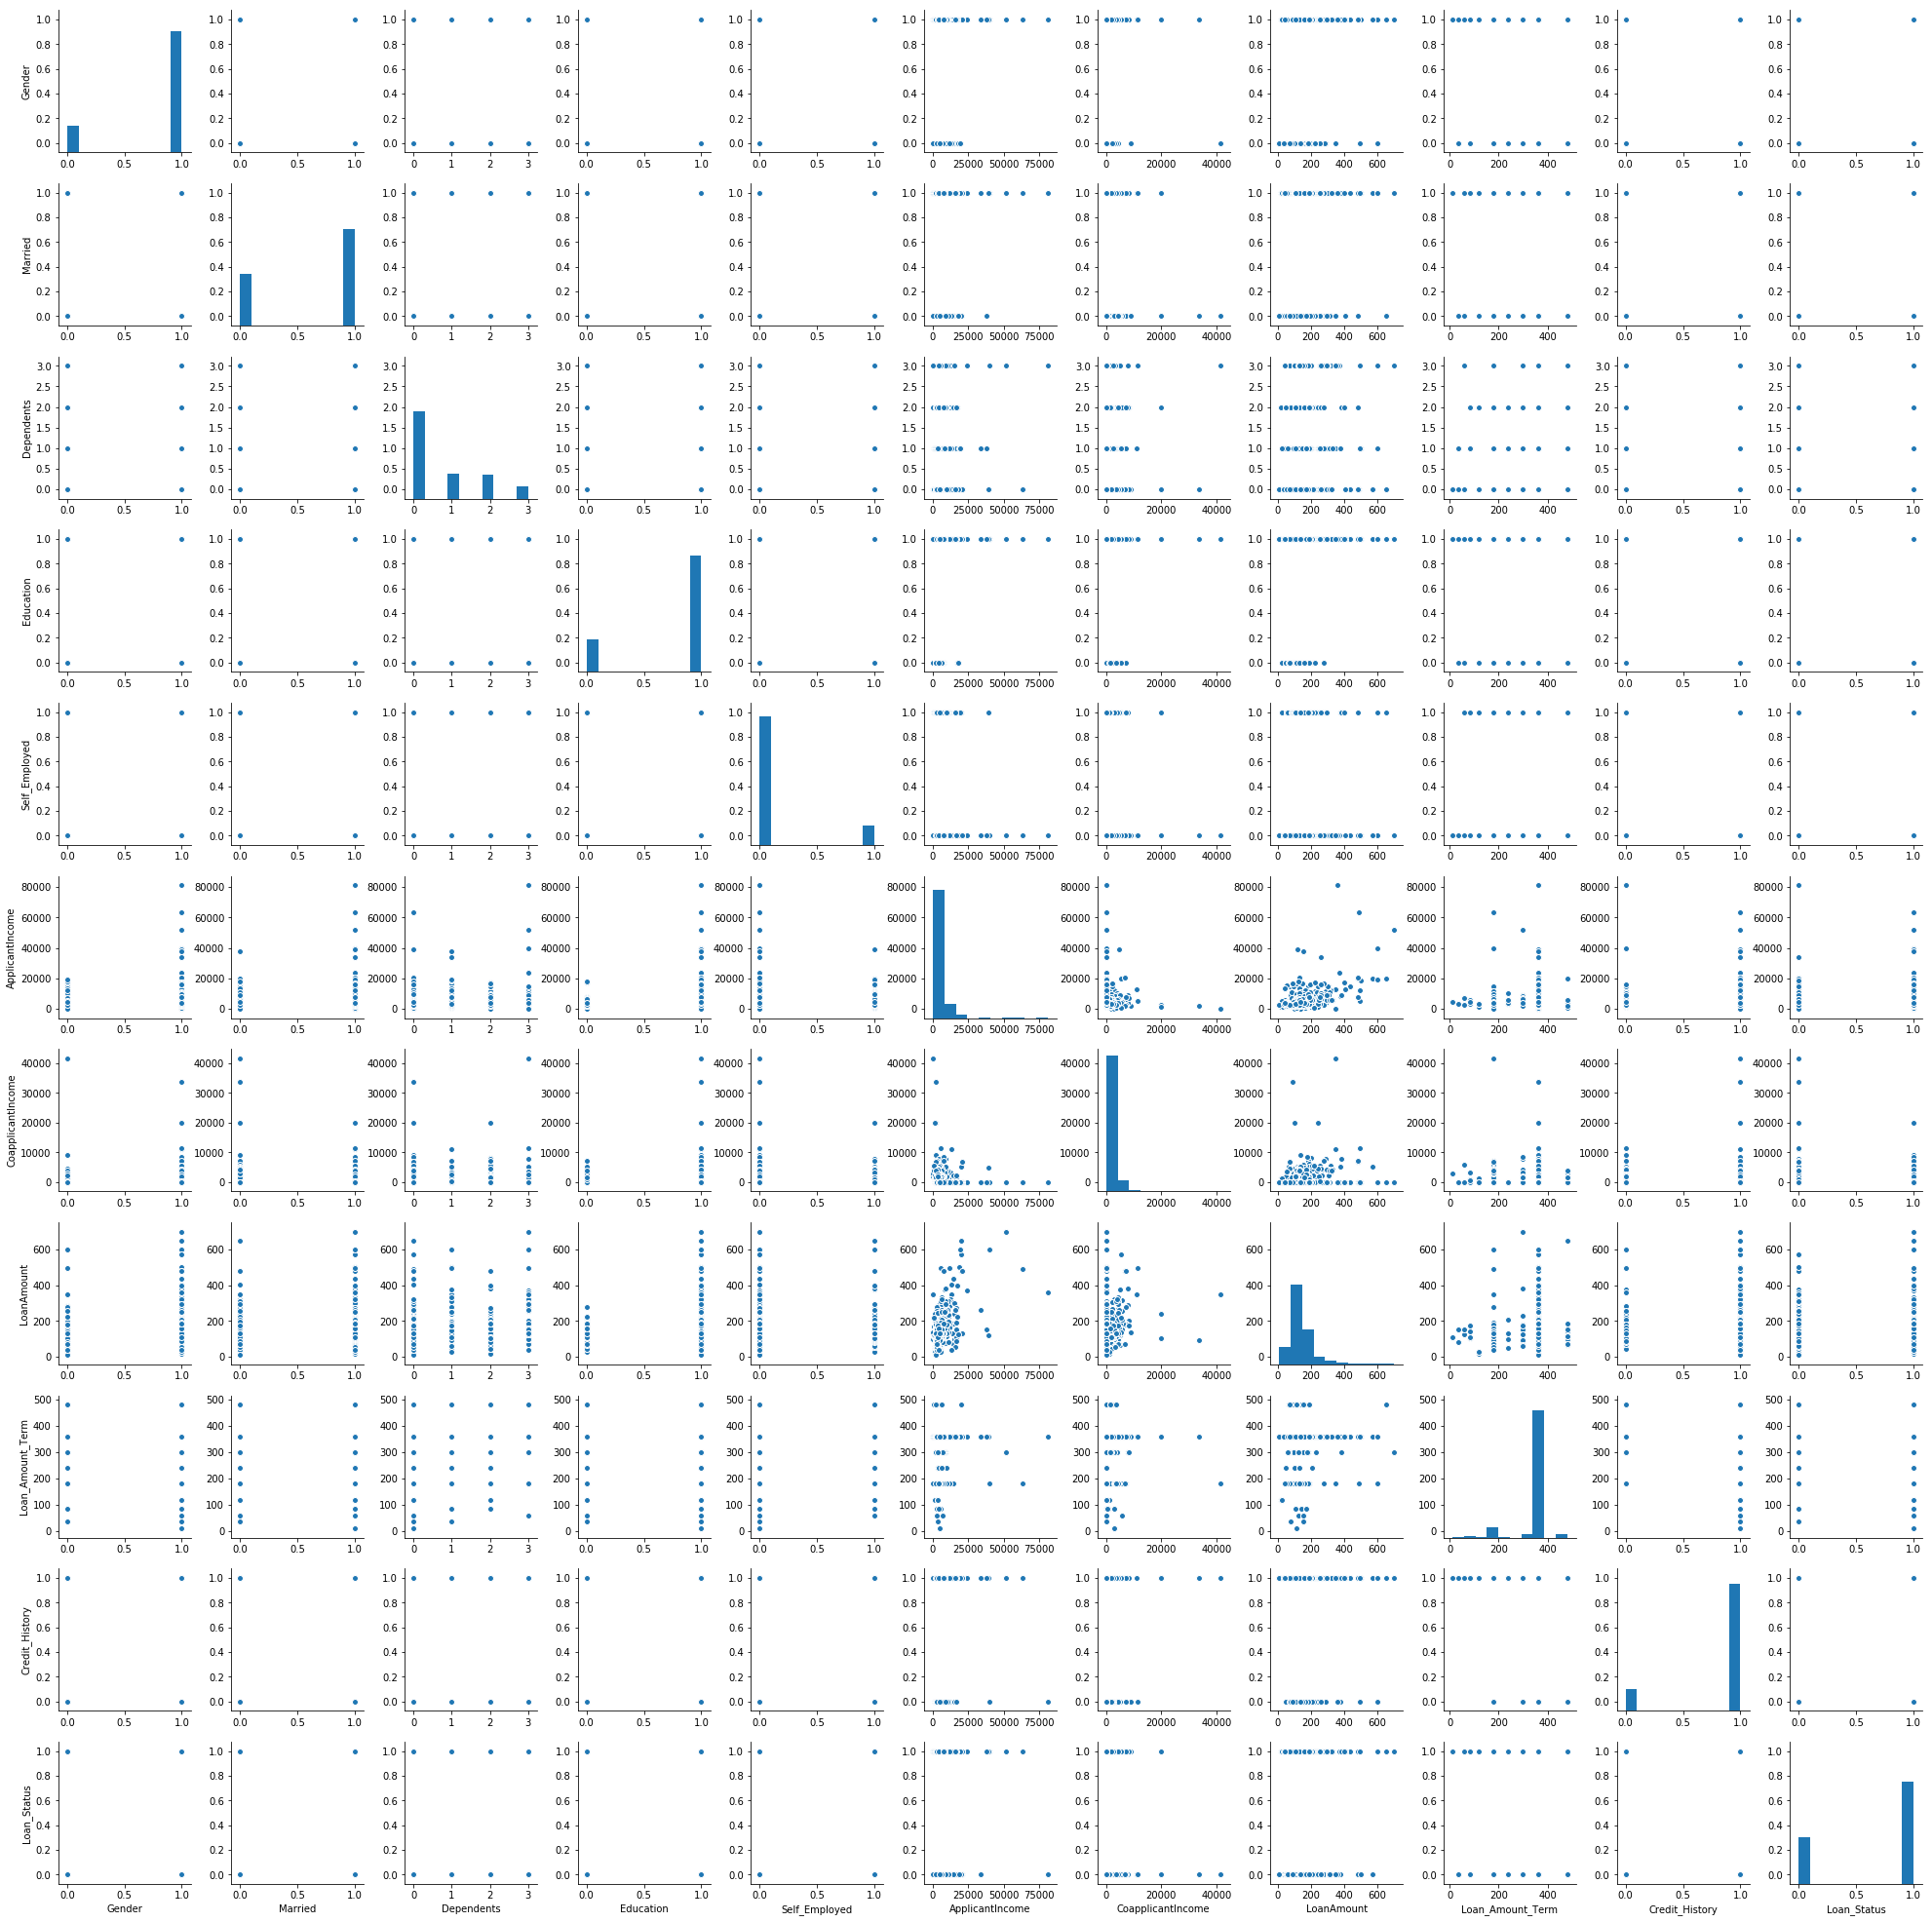

In [22]:
sns.pairplot(dataset)

In [23]:
X_test.shape

(154, 10)

In [24]:
y_test.shape

(154,)

In [25]:
X_train.shape

(460, 10)

In [26]:
y_train.shape

(460,)

In [27]:
import pickle
s = pickle.dumps(classifier)

In [28]:
from sklearn.externals import joblib
joblib.dump(classifier, 'filename.pkl')

['filename.pkl']

In [29]:
get_ipython().system(u'pip install watson-machine-learning-client --upgrade')

    100% |████████████████████████████████| 542kB 13.3MB/s ta 0:00:01
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.21.0)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.18.4)
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2019.3.9)
Requirement not upgraded as not directly required: ibm-cos-sdk in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.0.1)
Requirement not upgraded as not directly required: tqdm in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (4.19.5)
Requirement not upgraded as not directly required: tabulate in /opt/conda/envs/DSX-Python35/lib/py

In [30]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-07-05 04:52:08,325 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [31]:
wml_credentials={
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "access_key": "9i2YtxC8OcwcnHROLaYKB7FZmyQ75leV4d2aaVdL-lRH",
  "username": "ee95b629-885b-435c-a0e8-a0e89d668cc7",
  "password": "210d6984-b738-4aa7-a173-c755c4ca0f41",
  "instance_id": "4966deef-36e2-4ea5-9661-c30a0c82172e"
}

In [32]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [33]:
instance_details = client.service_instance.get_details()

In [34]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Loan", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "LoanIBM@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Loan_Risk"}

In [35]:
model_artifact =client.repository.store_model(classifier, meta_props=model_props)

In [36]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [37]:
client.repository.list_models()

------------------------------------  ---------  ------------------------  -----------------
GUID                                  NAME       CREATED                   FRAMEWORK
25d4494f-1562-4af7-ad01-dd87ec52f78f  Loan_Risk  2019-07-05T04:52:08.552Z  scikit-learn-0.19
------------------------------------  ---------  ------------------------  -----------------


In [38]:
loaded_model = client.repository.load(published_model_uid)

In [39]:
created_deployment = client.deployments.create(published_model_uid, name="Loan_Risk")



#######################################################################################

Synchronous deployment creation for uid: '25d4494f-1562-4af7-ad01-dd87ec52f78f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='dad57ad7-fc51-4605-8b8f-35fc15d7d5dc'
------------------------------------------------------------------------------------------------




In [40]:
scoring_endpoint = client.deployments.get_scoring_url(created_deployment)

In [41]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/4966deef-36e2-4ea5-9661-c30a0c82172e/deployments/dad57ad7-fc51-4605-8b8f-35fc15d7d5dc/online'

In [42]:
client.deployments.list()

------------------------------------  ---------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME       TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
dad57ad7-fc51-4605-8b8f-35fc15d7d5dc  Loan_Risk  online  DEPLOY_SUCCESS  2019-07-05T04:53:23.167Z  scikit-learn-0.19  model
------------------------------------  ---------  ------  --------------  ------------------------  -----------------  -------------


In [43]:
scoring_payload = {"fields": ["Gen","Married","Dependent","Edu","SE","AI","CI","Loan_Amt","Loan_Amt_Term","CR"],"values": [[1,0,0,1,0,5849,0,128,360,1]]}

In [44]:
predictions = client.deployments.score(scoring_endpoint, scoring_payload)

In [45]:
predictions

{'fields': ['prediction', 'probability'], 'values': [[1, [0.3, 0.7]]]}